# Understanding `groupby`, `mean`, and `unstack` in Pandas

Let's explore how to use `groupby`, `mean`, and `unstack` methods in pandas with a step-by-step example, focusing particularly on how `unstack` transforms data for analysis and visualization.

## Example Dataset

Consider a dataset containing temperature readings across different locations for each month. Here's a simplified representation of such data:

In [1]:
import pandas as pd

# Sample data creation
data = {'location': ['City A', 'City A', 'City B', 'City B', 'City A', 'City A', 'City B', 'City B'],
        'month': ['Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb'],
        'temperature': [32, 35, 45, 48, 30, 36, 46, 47]}
df = pd.DataFrame(data)
df

,location,month,temperature
0,City A,Jan,32
1,City A,Feb,35
2,City B,Jan,45
3,City B,Feb,48
4,City A,Jan,30
5,City A,Feb,36
6,City B,Jan,46
7,City B,Feb,47


## Step 1: Group by and Mean
First, group the data by `location` and `month`, then calculate the average temperature for each group.

In [2]:
# Grouping by location and month and calculating mean
grouped = df.groupby(['location', 'month'])['temperature'].mean()
grouped

location  month
City A    Feb      35.5
          Jan      31.0
City B    Feb      47.5
          Jan      45.5
Name: temperature, dtype: float64

## Step 2: Unstack
Use `unstack` to pivot the month level of the index into columns, transforming the data into a DataFrame suitable for a heatmap.

In [3]:
# Unstacking the month level to columns
heatmap_data = grouped.unstack(level=1)
heatmap_data

month,Feb,Jan
location,,
City A,35.5,31.0
City B,47.5,45.5


## Heatmap Visualization
With the `heatmap_data` DataFrame, visualize the data using seaborn to create a heatmap.

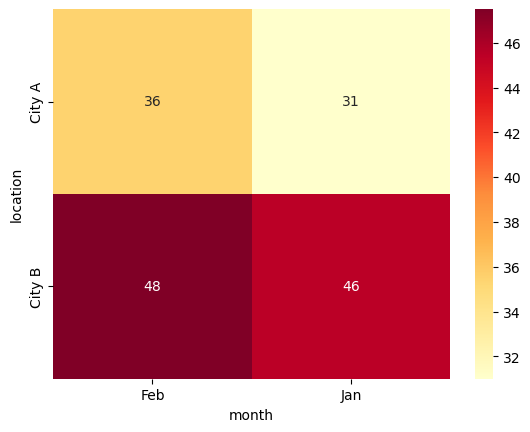

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True)
plt.show()